# Exercise 1
## Data preprocessing

### Preprocess the data by centering the variables and divide them by their standard deviation.

In [55]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt

In [56]:
df = pd.read_excel("data/Dry_Bean_Dataset.xlsx")
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [57]:
class_column=df["Class"]
df = df.subtract(df.mean(numeric_only=True))
df = df.divide(df.std())
df["Class"]= class_column
df.head(10)


,Area,AspectRation,Class,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,MajorAxisLength,MinorAxisLength,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Solidity,roundness
0,-0.840718,-1.564995,SEKER,1.839049,-0.841420,-2.185640,-1.063302,0.289077,-1.306550,-0.631130,-1.143277,0.680761,2.402085,1.925653,0.838340,0.367600,1.423815
1,-0.829157,-1.969712,SEKER,2.495358,-0.826071,-3.685904,-1.044178,0.697451,-1.395860,-0.434429,-1.013887,0.367953,3.100779,2.689603,0.771110,-0.462890,0.231046
2,-0.807128,-1.514236,SEKER,1.764778,-0.808674,-2.045261,-1.008047,0.578174,-1.252311,-0.585713,-1.078789,0.603107,2.235009,1.841288,0.916721,0.518398,1.252819
3,-0.785712,-1.741554,SEKER,2.081639,-0.773947,-2.742110,-0.973301,0.671235,-1.278778,-0.439274,-0.977179,0.401703,2.514982,2.204169,-0.197978,-2.241685,0.515030
4,-0.781210,-2.117915,SEKER,2.765229,-0.784257,-4.534862,-0.966044,0.476003,-1.380420,-0.266654,-1.097344,0.118264,3.270862,3.013352,0.939605,0.804743,1.874924
5,-0.776470,-1.670900,SEKER,2.007054,-0.778111,-2.505324,-0.958420,0.528776,-1.255410,-0.461652,-1.028311,0.404661,2.411297,2.118057,0.955573,0.507890,1.185653
6,-0.769718,-1.769403,SEKER,2.163383,-0.765685,-2.841435,-0.947589,0.258090,-1.273035,-0.405418,-0.864486,0.320294,2.561056,2.299039,0.912736,-0.656915,-0.339415
7,-0.768286,-1.693101,SEKER,2.035483,-0.769816,-2.577509,-0.945296,0.426779,-1.250320,-0.434367,-1.052577,0.368391,2.420538,2.150829,0.751467,0.477221,1.576404
8,-0.762625,-1.692040,SEKER,2.038369,-0.763199,-2.574017,-0.936249,0.444700,-1.244048,-0.425028,-1.024792,0.350445,2.409234,2.154159,0.890807,0.277429,1.360184
9,-0.757544,-1.550229,SEKER,1.819080,-0.760647,-2.144010,-0.928149,0.691638,-1.200946,-0.475277,-1.042278,0.426832,2.168396,1.902929,0.915578,0.786830,1.629647


Get a numpy array from the dataframe

In [58]:
df_numeric = df.loc[:, df.columns!='Class']
input_data = df_numeric.values
input_data

array([[-0.84071764, -1.56499502,  1.83904884, ...,  0.83834023,
         0.36759993,  1.42381476],
       [-0.82915718, -1.96971202,  2.49535762, ...,  0.77111009,
        -0.46288958,  0.23104555],
       [-0.80712752, -1.51423569,  1.76477791, ...,  0.91672146,
         0.51839783,  1.25281892],
       ...,
       [-0.37202459, -0.44860112,  0.37051917, ...,  0.39023681,
         0.59134868,  0.75843993],
       [-0.37175177, -0.38072134,  0.28508802, ...,  0.03643867,
         0.14371184,  0.58173203],
       [-0.37134255,  0.14836892, -0.2408954 , ...,  0.71369326,
         0.5375193 ,  0.25367214]])

## Principal Components Analysis (PCA)
### Compute the Principal Components Analysis on these variables. Obtain and plot the eigenvalue spectrum using logscale for the y-axis.
Function to get the covariance matrix.

In [59]:
def get_covariance_matrix(data):
    return np.dot(data.T, data)/data.shape[0]

Function to get the components, given a certain fidelity threshold.

In [60]:
def get_n_components(sorted_values, fidelity_threshold):
    i=1
    eigen_sum = np.sum(sorted_values)
    partial_sum = sorted_values[0]
    while (partial_sum/eigen_sum) < fidelity_threshold:
        partial_sum += sorted_values[i]
        i+=1
    return i

Function to perform the PCA. The number of components can be either set by the user or it can be found automatically based on the fidelity threshold.

In [61]:
def pca(data, n_components=None, fidelity_threshold=0.95):

    covariance_matrix = get_covariance_matrix(data)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # if the number of principal components is not provided by the user, get it automatically
    if n_components is None:
        n_components=get_n_components(sorted_eigenvalues, fidelity_threshold)
    
    # plotting the eigenvalues
    x=np.arange(0,len(sorted_eigenvalues))

    plt.figure()
    plt.semilogy()
    plt.title('Spectrum of the eigenvalues in logscale')
    plt.plot(x[:n_components], sorted_eigenvalues[:n_components], 'o', color = "orange", label="Selected eigenvalues")
    plt.plot(x[n_components:], sorted_eigenvalues[n_components:], 'o')
    plt.legend()
    plt.show()

    # get principal components
    pca_components = sorted_eigenvectors[:, :n_components]

    transformed_data = np.dot(data, pca_components)

    return transformed_data, pca_components


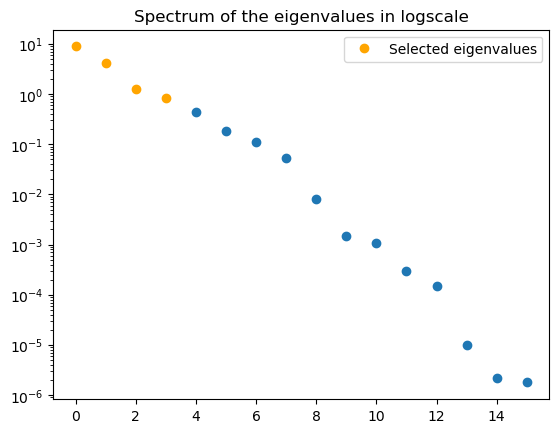

In [62]:
transformed_data, pca_components=pca(input_data)


## Project the data in the two first PCs and color it by the class column.

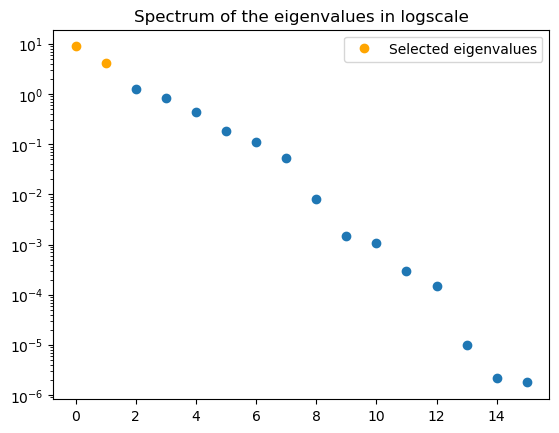

array([[-4.98137799,  1.82463028],
       [-5.43659253,  2.93225707],
       [-4.75791351,  1.82681673],
       ...,
       [-1.41746264,  0.14118852],
       [-1.11462489, -0.21267151],
       [-0.76640871, -0.64649036]])

In [63]:
transformed_data, pca_components=pca(input_data, n_components=2)
transformed_data

In [64]:
transformed_df = pd.DataFrame(transformed_data, columns=["Feature 1", "Feature 2"])
transformed_df["Class"]=df["Class"]
transformed_df.head(10)

,Feature 1,Feature 2,Class
0,-4.981378,1.824630,SEKER
1,-5.436593,2.932257,SEKER
2,-4.757914,1.826817,SEKER
3,-4.300383,2.003588,SEKER
4,-6.349107,4.088055,SEKER
5,-4.946297,2.339649,SEKER
6,-4.518819,2.179813,SEKER
7,-5.014534,2.453733,SEKER
8,-4.934818,2.423467,SEKER
9,-4.789652,2.183309,SEKER


In [65]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

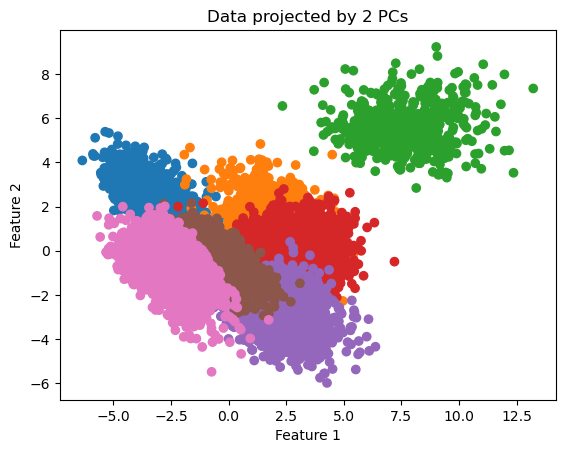

In [66]:
plt.figure()
plt.title('Data projected by 2 PCs')
colors = {'SEKER':'tab:blue', 'BARBUNYA':'tab:orange', 'BOMBAY':'tab:green', 'CALI':'tab:red', 'HOROZ':'tab:purple', 'SIRA':'tab:brown', 'DERMASON':'tab:pink'}
plt.scatter(transformed_df['Feature 1'], transformed_df['Feature 2'], c=transformed_df['Class'].map(colors))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Repeat the plot using the three instead of two PCs.

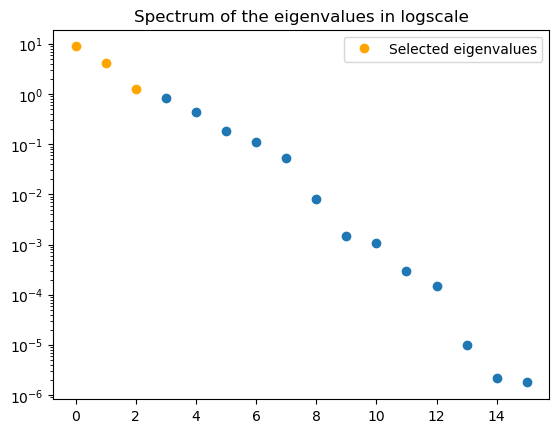

array([[-4.98137799,  1.82463028, -0.74899352],
       [-5.43659253,  2.93225707, -2.18229381],
       [-4.75791351,  1.82681673, -0.51401872],
       ...,
       [-1.41746264,  0.14118852,  0.38719213],
       [-1.11462489, -0.21267151, -0.14408301],
       [-0.76640871, -0.64649036,  0.99408505]])

In [67]:
transformed_data, pca_components=pca(input_data, n_components=3)
transformed_data

In [68]:
transformed_df = pd.DataFrame(transformed_data, columns=["Feature 1", "Feature 2", "Feature 3"])
transformed_df["Class"]=df["Class"]
transformed_df.head(10)

,Feature 1,Feature 2,Feature 3,Class
0,-4.981378,1.824630,-0.748994,SEKER
1,-5.436593,2.932257,-2.182294,SEKER
2,-4.757914,1.826817,-0.514019,SEKER
3,-4.300383,2.003588,-3.554317,SEKER
4,-6.349107,4.088055,-1.179156,SEKER
5,-4.946297,2.339649,-0.717146,SEKER
6,-4.518819,2.179813,-2.012576,SEKER
7,-5.014534,2.453733,-0.819862,SEKER
8,-4.934818,2.423467,-0.923688,SEKER
9,-4.789652,2.183309,-0.268595,SEKER


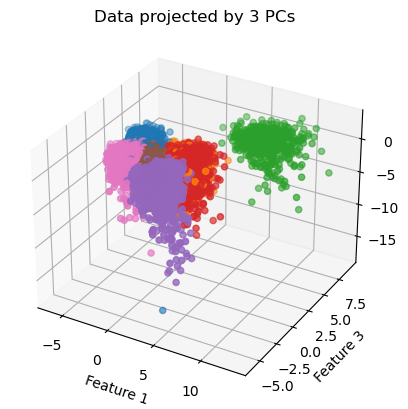

In [69]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('Data projected by 3 PCs')
colors = {'SEKER':'tab:blue', 'BARBUNYA':'tab:orange', 'BOMBAY':'tab:green', 'CALI':'tab:red', 'HOROZ':'tab:purple', 'SIRA':'tab:brown', 'DERMASON':'tab:pink'}
ax.scatter(transformed_df['Feature 1'], transformed_df['Feature 2'], transformed_df["Feature 3"], c=transformed_df['Class'].map(colors))
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_ylabel("Feature 3")
plt.show()